# Author : Kritibas Dutta
# Task 1 : Prediction using supervised machine learning

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data in pandas
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
# first 5 rows of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

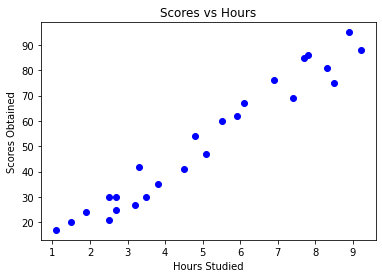

In [7]:
# scatter plotting between dependent variable Scores and independent variable Hours
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title("Scores vs Hours")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

 we can see a positive correlation between the variables.

In [8]:
#divide the input data and output data
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
x
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [9]:
# splitting the data into train and test sets using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [10]:
# training our algorithm
from sklearn.linear_model import LinearRegression
Regress = LinearRegression()
Regress.fit(x_train, y_train)
print ('Coefficients: ', Regress.coef_)
print ('Intercept: ',Regress.intercept_)

Coefficients:  [9.78856669]
Intercept:  2.370815382341881


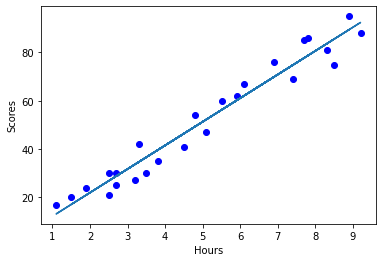

In [11]:
# plotting the regression line and plotting for test data
plt.scatter(x, y, color='blue')
plt.plot(x, Regress.coef_*x + Regress.intercept_)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [12]:
# obtaining predictions
print(x_test)
yhat = Regress.predict(x_test)
yhat

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [13]:
#comparing actual and predicted values
Dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
Dataframe

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [14]:
# testing with my data
hours = [[9.25]]
own_prediction = Regress.predict(hours)
own_prediction

array([92.91505723])

In [15]:
print("Predicted score: {}" .format(own_prediction[0]))

Predicted score: 92.91505723477056


In [16]:
# evaluation of the model by mean squared error
from sklearn import metrics
print('Mean Absolute Error:',
metrics.mean_absolute_error(y_test, yhat))

Mean Absolute Error: 4.419727808027652
